In [113]:
#load the necessary functions
from __future__ import print_function
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pylab as pylab
import itertools
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
import seaborn as sns
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 22})
pylab.rcParams.update(params)

# Load trajectories

In [2]:
#load the dcd file that has alignmentacarbons all the smaller dcd files
#these are all aligned to the alpha carbons
glycosylatedrep1 = md.load('../partial_glycosylation/trajectories/replicate1/no_lipids/alignmentacarbons.dcd', top='../partial_glycosylation/trajectories/replicate1/no_lipids/subset.pdb')
glycosylatedrep2 = md.load('../partial_glycosylation/trajectories/replicate2/no_lipids/alignmentacarbons.dcd', top='../partial_glycosylation/trajectories/replicate2/no_lipids/subset.pdb')
glycosylatedrep3 = md.load('../partial_glycosylation/trajectories/replicate3/no_lipids/alignmentacarbons.dcd', top='../partial_glycosylation/trajectories/replicate3/no_lipids/subset.pdb')
unglycosylatedrep1 = md.load('../no_glycosylation/replicate1/no_lipids/alignmentacarbons.dcd', top='../no_glycosylation/replicate1/no_lipids/subset.pdb')
unglycosylatedrep2 = md.load('../no_glycosylation/replicate2/no_lipids/alignmentacarbons.dcd', top='../no_glycosylation/replicate2/no_lipids/subset.pdb')
unglycosylatedrep3 = md.load('../no_glycosylation/replicate3/no_lipids/alignmentacarbons.dcd', top='../no_glycosylation/replicate3/no_lipids/subset.pdb')
virion = md.load('../whole_virion/alignmentacarbons.dcd', top='../whole_virion/subset.pdb')

glycosylatedrep1nog = md.load('../partial_glycosylation/trajectories/replicate1/no_lipids/alignmentacarbons_noglycans.dcd', top='../partial_glycosylation/trajectories/replicate1/no_lipids/subset_noglycans.pdb')
glycosylatedrep2nog = md.load('../partial_glycosylation/trajectories/replicate2/no_lipids/alignmentacarbons_noglycans.dcd', top='../partial_glycosylation/trajectories/replicate2/no_lipids/subset_noglycans.pdb')
glycosylatedrep3nog = md.load('../partial_glycosylation/trajectories/replicate3/no_lipids/alignmentacarbons_noglycans.dcd', top='../partial_glycosylation/trajectories/replicate3/no_lipids/subset_noglycans.pdb')
virionnog = md.load('../whole_virion/alignmentacarbons_noglycans.dcd', top='../whole_virion/subset_noglycans.pdb')

/home/cseitz/.local/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbfile.py:194: RuntimeWarning: divide by zero encountered in true_divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/home/cseitz/.local/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbfile.py:198: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  'cell vectors.', category=UserWarning)


In [3]:
#eliminate the first frame since the whole system jumps there, and stride so they will match up
glycosylatedrep1_stride100 = glycosylatedrep1[1:44100:100]
glycosylatedrep2_stride100 = glycosylatedrep2[1:44100:100]
glycosylatedrep3_stride100 = glycosylatedrep3[1:44100:100]
unglycosylatedrep1_stride100 = unglycosylatedrep1[1:44100:100]
unglycosylatedrep2_stride100 = unglycosylatedrep2[1:44100:100]
unglycosylatedrep3_stride100 = unglycosylatedrep3[1:44100:100]
virion_stride16 = virion[1:7050:16]

glycosylatedrep1_stride100nog = glycosylatedrep1nog[1:44100:100]
glycosylatedrep2_stride100nog = glycosylatedrep2nog[1:44100:100]
glycosylatedrep3_stride100nog = glycosylatedrep3nog[1:44100:100]
virion_stride16nog = virionnog[1:7050:16]

In [4]:
#calculate radius of gyration of the whole protein including glycans
rgg1 = md.compute_rg(glycosylatedrep1_stride100)
rgg2 = md.compute_rg(glycosylatedrep2_stride100)
rgg3 = md.compute_rg(glycosylatedrep3_stride100)
rgu1 = md.compute_rg(unglycosylatedrep1_stride100)
rgu2 = md.compute_rg(unglycosylatedrep2_stride100)
rgu3 = md.compute_rg(unglycosylatedrep3_stride100)
rgv = md.compute_rg(virion_stride16)

#calculate radius of gyration of the whole protein without glycans
rgg1nog = md.compute_rg(glycosylatedrep1_stride100nog)
rgg2nog = md.compute_rg(glycosylatedrep2_stride100nog)
rgg3nog = md.compute_rg(glycosylatedrep3_stride100nog)
rgvnog = md.compute_rg(virion_stride16nog)

In [20]:
#cat the arrays for the averaged plots
rg_glycosylated = np.concatenate([[rgg1], [rgg2], [rgg3]])
rg_glycosylated_avg = np.average(rg_glycosylated, axis=0)
rg_glycosylated_std = np.std(rg_glycosylated, axis=0)
rg_glycosylated_stdplus = rg_glycosylated_avg + rg_glycosylated_std
rg_glycosylated_stdminus = rg_glycosylated_avg - rg_glycosylated_std
rg_unglycosylated = np.concatenate([[rgu1], [rgu2], [rgu3]])
rg_unglycosylated_avg = np.average(rg_unglycosylated, axis=0)
rg_unglycosylated_std = np.std(rg_unglycosylated, axis=0)
rg_unglycosylated_stdplus = rg_unglycosylated_avg + rg_unglycosylated_std
rg_unglycosylated_stdminus = rg_unglycosylated_avg - rg_unglycosylated_std

rg_glycosylatednog = np.concatenate([[rgg1nog], [rgg2nog], [rgg3nog]])
rg_glycosylated_avgnog = np.average(rg_glycosylatednog, axis=0)
rg_glycosylated_nogstd = np.std(rg_glycosylatednog, axis=0)
rg_glycosylated_nogstdplus = rg_glycosylated_avgnog + rg_glycosylated_nogstd
rg_glycosylated_nogstdminus = rg_glycosylated_avgnog - rg_glycosylated_nogstd

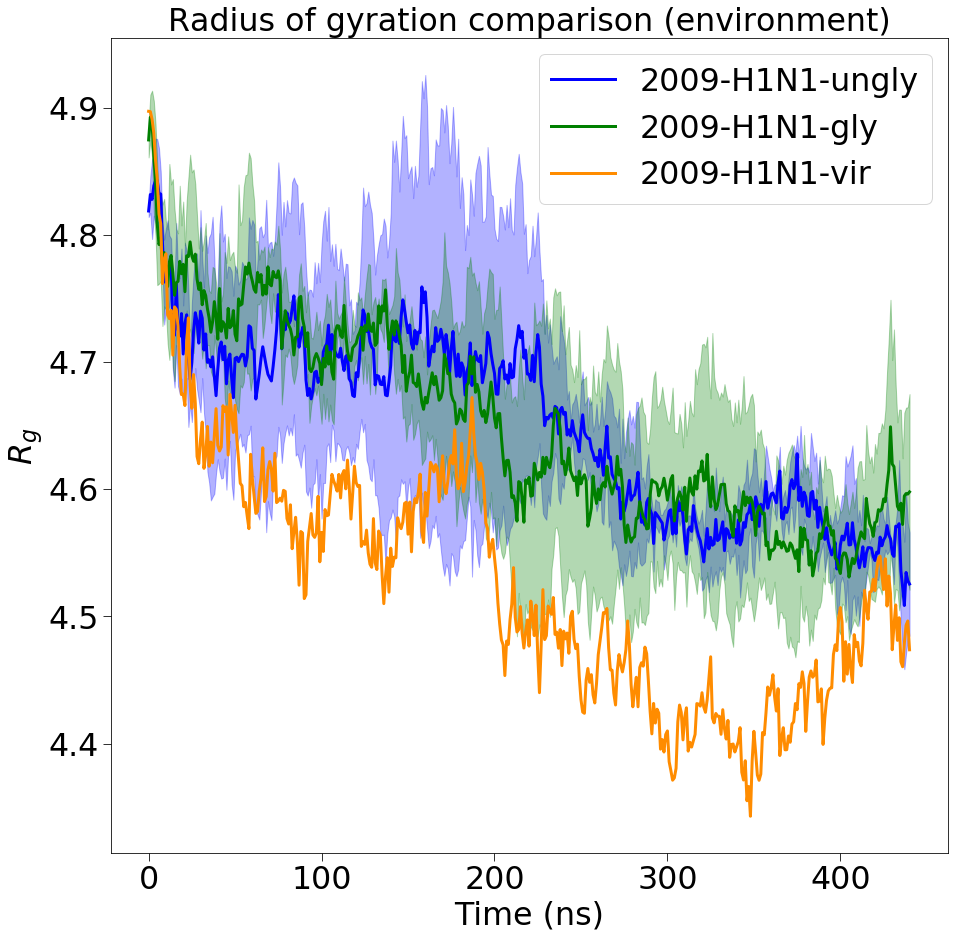

In [115]:
#Radius of gyration plot of the conformational space accessed as a function of density for the glycosylated systems
plt.figure()
x = np.arange(0, 441)
plt.plot(rg_unglycosylated_avg, color='blue', linewidth=3)
plt.plot(rg_glycosylated_avg, color='green', linewidth=3)
plt.plot(rgv, color='darkorange', linewidth=3)
plt.fill_between(x, rg_unglycosylated_stdplus, rg_unglycosylated_stdminus, color='blue', alpha=0.3)
plt.fill_between(x, rg_glycosylated_stdplus, rg_glycosylated_stdminus, color='green', alpha=0.3)
plt.xlabel('Time (ns)')
plt.ylabel('$R_g$')
plt.xticks(np.arange(0,500, step=100))
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='upper right')
plt.title('Radius of gyration comparison (environment)')
plt.savefig('radius_of_gyration_combined.png')

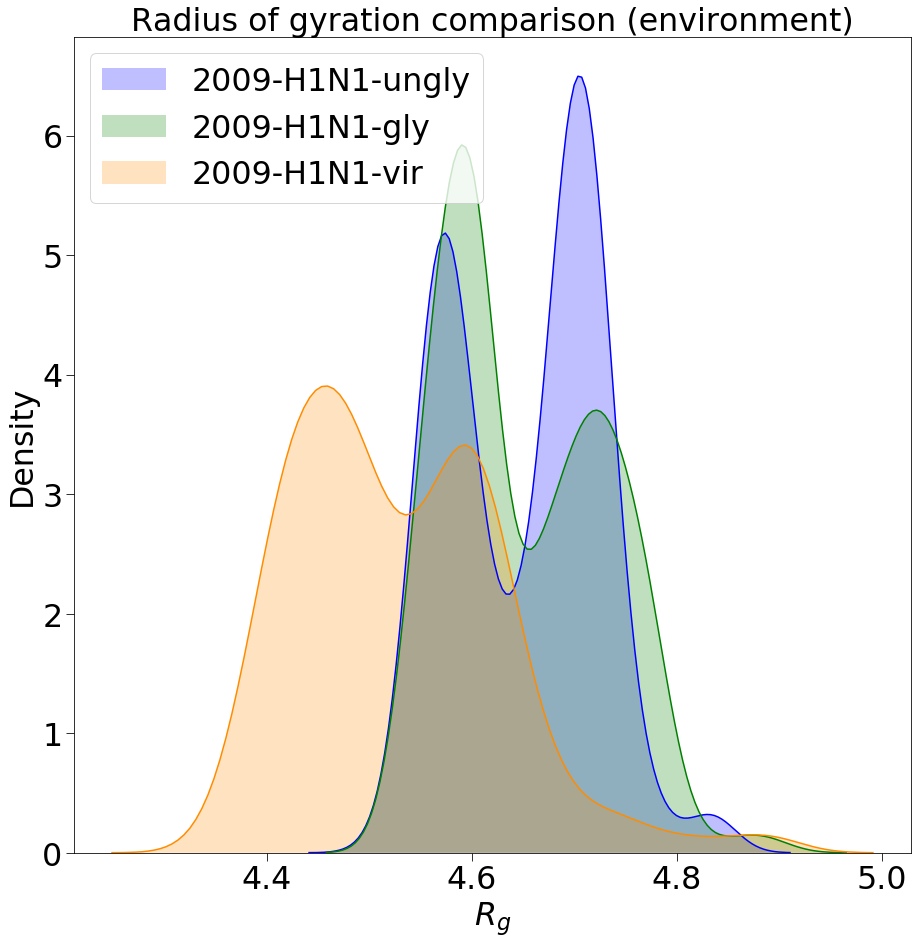

In [108]:
#Radius of gyration plot of the conformational space accessed as a function of density for the glycosylated systems
plt.figure()
plt.xlabel('$R_g$')
plt.ylabel('Density')
sns.kdeplot(rg_unglycosylated_avg, color='blue', shade=True)
sns.kdeplot(rg_glycosylated_avg, color='green', shade=True)
sns.kdeplot(rgv, color='darkorange', shade=True)
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='upper left')
plt.title('Radius of gyration comparison (environment)')
plt.savefig('radius_of_gyration_combined_density.png')

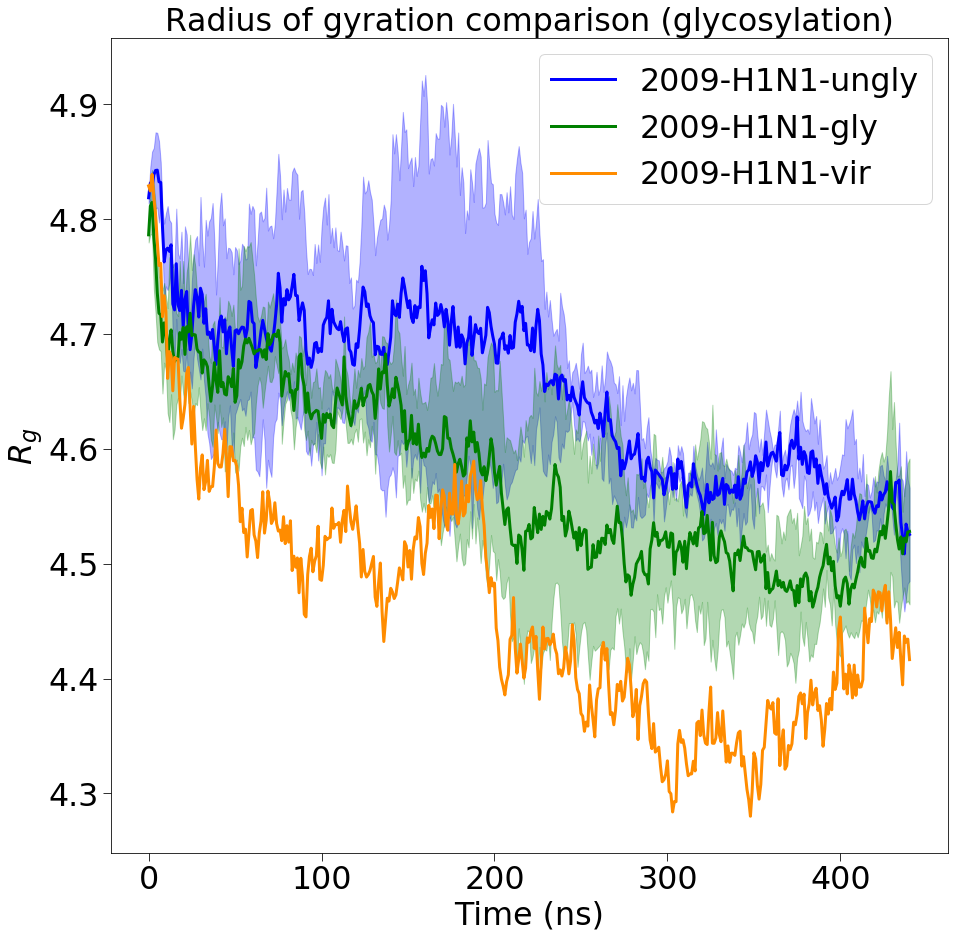

In [114]:
#Radius of gyration plot of the conformational space accessed as a function of density for the systems without measuring glycans
plt.figure()
x = np.arange(0, 441)
plt.plot(rg_unglycosylated_avg, color='blue', linewidth=3)
plt.plot(rg_glycosylated_avgnog, color='green', linewidth=3)
plt.plot(rgvnog, color='darkorange', linewidth=3)
plt.fill_between(x, rg_unglycosylated_stdplus, rg_unglycosylated_stdminus, color='blue', alpha=0.3)
plt.fill_between(x, rg_glycosylated_nogstdplus, rg_glycosylated_nogstdminus, color='green', alpha=0.3)
plt.xlabel('Time (ns)')
plt.ylabel('$R_g$')
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='upper right')
plt.title('Radius of gyration comparison (glycosylation)')
plt.savefig('radius_of_gyration_combined_noglycans.png')

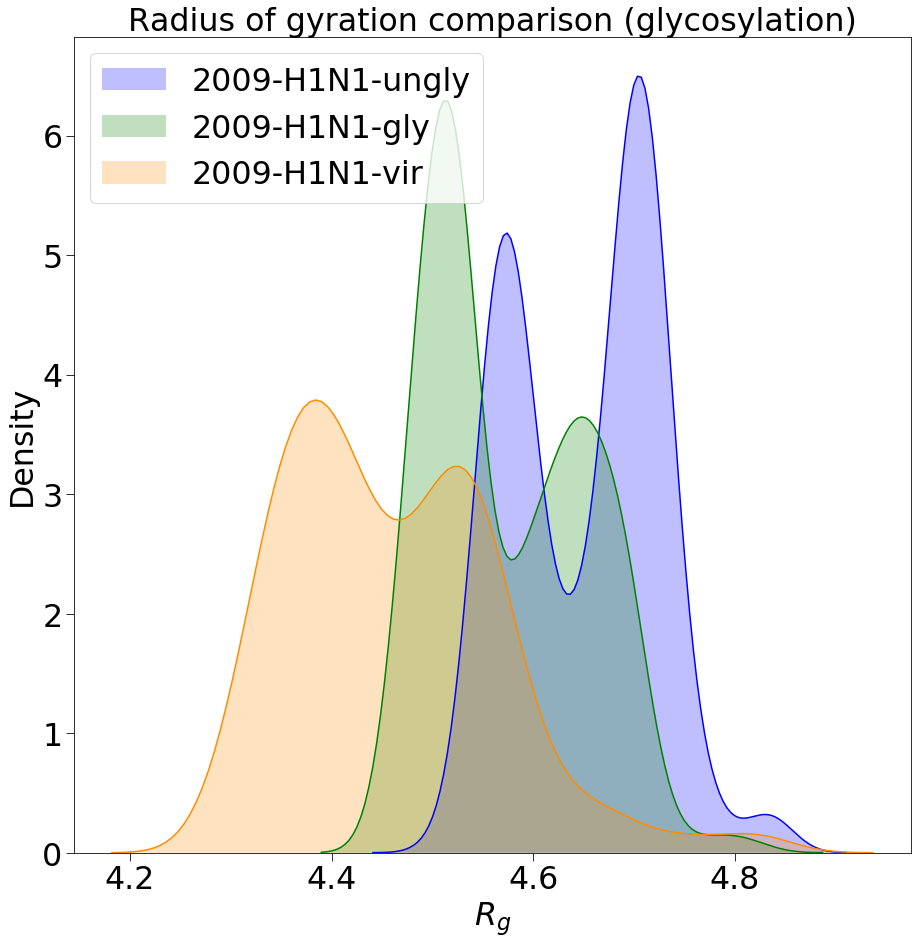

In [109]:
#Radius of gyration plot of the conformational space accessed as a function of density for the glycosylated systems
plt.figure()
plt.xlabel('$R_g$')
plt.ylabel('Density')
sns.kdeplot(rg_unglycosylated_avg, color='blue', shade=True)
sns.kdeplot(rg_glycosylated_avgnog, color='green', shade=True)
sns.kdeplot(rgvnog, color='darkorange', shade=True)
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='upper left')
plt.title('Radius of gyration comparison (glycosylation)')
plt.savefig('radius_of_gyration_combined_noglycans_density.png')